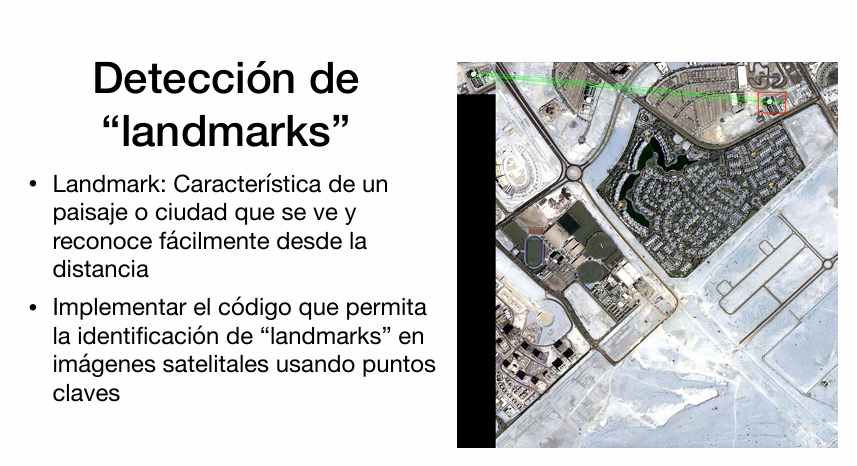

In [ ]:

import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab


In [ ]:
# Ruta de la carpeta que contiene las imágenes
carpeta = '/content/drive/MyDrive/Vision/Ejercicios_clase/Ims'

# Lista para almacenar las imágenes
imagenes = []

In [ ]:
# Iterar sobre los archivos en la carpeta
for archivo in os.listdir(carpeta):
    # Comprobar si el archivo es una imagen (por ejemplo, con extensión .jpg o .png)
    if archivo.endswith('.jpg'):
        # Leer la imagen
        imagen = cv.imread(os.path.join(carpeta, archivo),cv.IMREAD_GRAYSCALE)
        # Añadir la imagen a la lista
        imagenes.append(imagen)

# Mostrar el número de imágenes leídas
print(f'Se han leído {len(imagenes)} imágenes.')

Se han leído 8 imágenes.


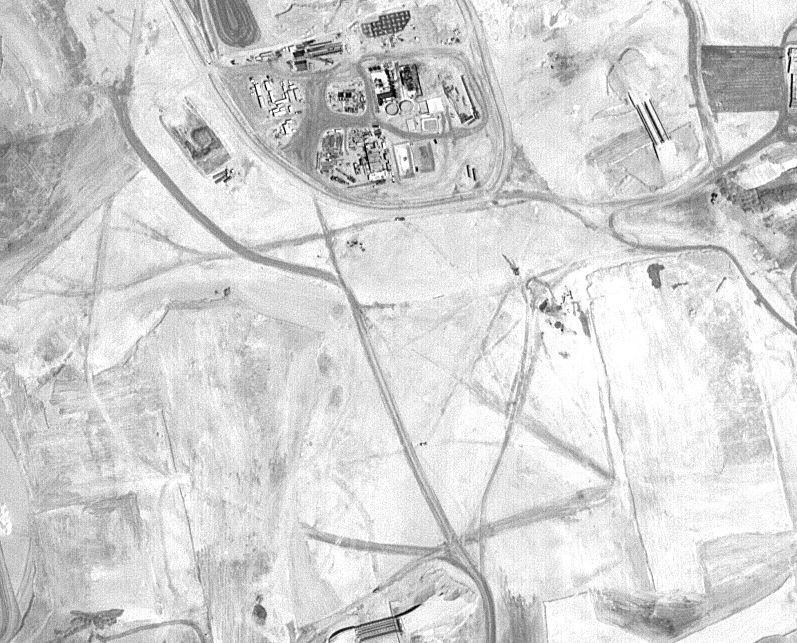

In [ ]:
# Mostrar la primera imagen
if imagenes:
    cv2_imshow(imagenes[0]) #SRC0
   # cv2_imshow(imagenes[1]) #Land2
   # cv2_imshow(imagenes[2]) #SRC2
   # cv2_imshow(imagenes[3]) #SRC1
   # cv2_imshow(imagenes[4]) #SRC3
    #cv2_imshow(imagenes[5]) #land0
   # cv2_imshow(imagenes[6]) #land1
   # cv2_imshow(imagenes[7]) #land3

#Combinar (0-5, 1-2, 3-6, 4-7)



In [ ]:
# Initiate ORB detector
orb = cv.ORB_create()


In [ ]:
# find the keypoints and descriptors with ORB
kp0, des0 = orb.detectAndCompute(imagenes[0],None)
kp1, des1 = orb.detectAndCompute(imagenes[1],None)
kp2, des2 = orb.detectAndCompute(imagenes[2],None)
kp3, des3 = orb.detectAndCompute(imagenes[3],None)
kp4, des4 = orb.detectAndCompute(imagenes[4],None)
kp5, des5 = orb.detectAndCompute(imagenes[5],None)
kp6, des6 = orb.detectAndCompute(imagenes[6],None)
kp7, des7 = orb.detectAndCompute(imagenes[7],None)

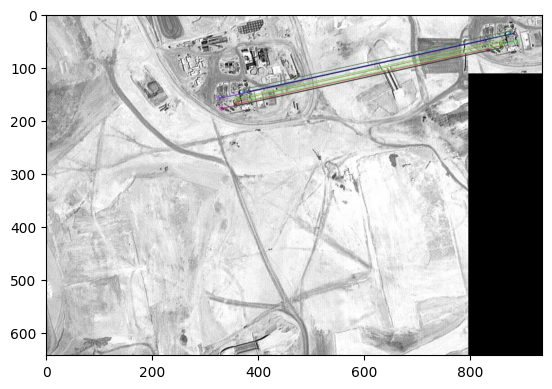

In [ ]:
# (0-5)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des0,des5)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(imagenes[0],kp0,imagenes[5],kp5,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


# Muestra la imagen con el bounding box
plt.imshow(img3)
plt.show()

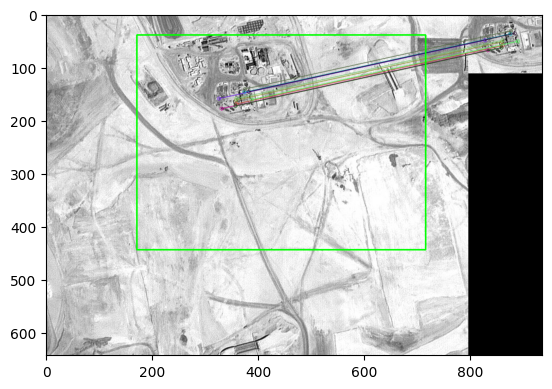

(<matplotlib.image.AxesImage at 0x7da31e4e4400>, None)

In [ ]:

# Encuentrar las coordenadas mínimas y máximas de los puntos clave
min_x = min([kp.pt[0] for kp in kp0])
min_y = min([kp.pt[1] for kp in kp0])
max_x = max([kp.pt[0] for kp in kp0])
max_y = max([kp.pt[1] for kp in kp0])

# Dibuja el bounding box en la imagen
cv.rectangle(img3, (int(min_x), int(min_y)), (int(max_x), int(max_y)), (0, 255, 0), 2)

# Muestra la imagen con el bounding box
plt.imshow(img3),plt.show()


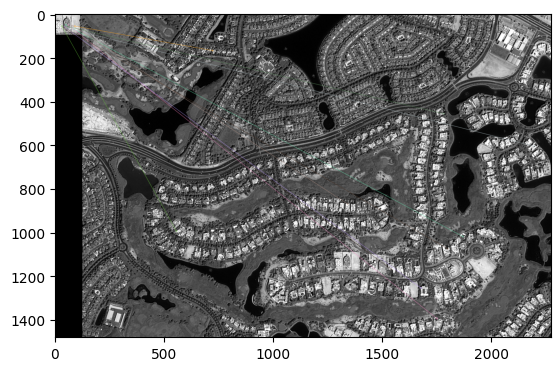

(<matplotlib.image.AxesImage at 0x7da339739fc0>, None)

In [ ]:
# (1-2)
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(imagenes[1],kp1,imagenes[2],kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

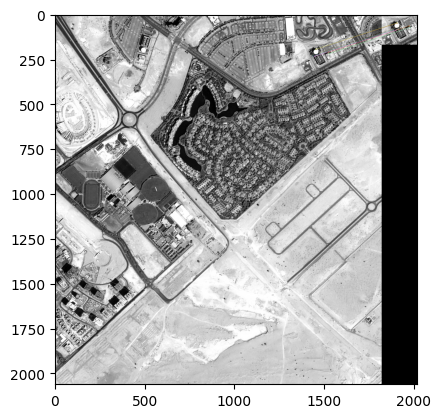

(<matplotlib.image.AxesImage at 0x7da31e0f81c0>, None)

In [ ]:
# (3-6)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des3,des6)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv.drawMatches(imagenes[3],kp3,imagenes[6],kp6,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

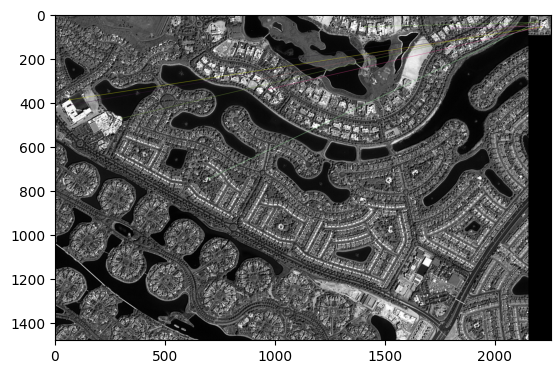

(<matplotlib.image.AxesImage at 0x7da31e2c7af0>, None)

In [ ]:
# ( 4-7)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des4,des7)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(imagenes[4],kp4,imagenes[7],kp7,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

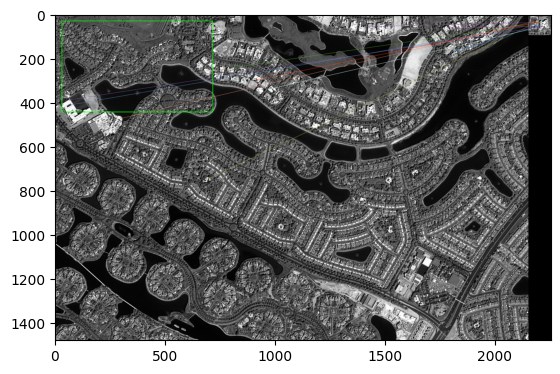

In [ ]:
# Inicializa las variables para almacenar las coordenadas mínimas y máximas
min_x, min_y = float('inf'), float('inf')
max_x, max_y = 0, 0

# Itera sobre los keypoints y actualiza las coordenadas mínimas y máximas
for kp in kp0 + kp5:
  x, y = kp.pt
  min_x = min(min_x, x)
  min_y = min(min_y, y)
  max_x = max(max_x, x)
  max_y = max(max_y, y)

# Dibuja el bounding box en la imagen combinada
cv.rectangle(img3, (int(min_x), int(min_y)), (int(max_x), int(max_y)), (0, 255, 0), 2)

# Muestra la imagen con el bounding box
plt.imshow(img3)
plt.show()
